<h1 style="text-align:center">
    Employee Salaries for different Job Roles
</h1>

<br>

<font color="darkblue">

<h3 style="text-align:center">
    Claudia del Pozo Iglesias
</h3>
    
<h3 style="text-align:center">
    Noviembre 2023
</h3>

<hr>

# Introducción

<br>

En este proyecto se desarrolla en Python un análisis básico de datos sobre los sueldos que ganan distintos empleados según sus cometidos y experiencia, a lo largo de distintos negocios y zonas del mundo.
La URL de referencia es la siguiente:

https://www.kaggle.com/datasets/inductiveanks/employee-salaries-for-different-job-roles

En ella puede encontrarse información más detallada, así como una descripción precisa de cada columna. Seguidamente, te toca a ti hacer una breve introducción, completando el fragmento de letra en azul y desarrollándolo a tu antojo.

<br>

<font color="darkblue">
A partir de los datos proporcionados, he conseguido llevar a cabo practicamente todos los apartados a excepción de las distintas gráficas. No me he acabado de aclarar con las pruebas de funcionamiento y no he podido conseguir el resultado esperado. En el resto de apartados creo que he sabido sacarlos adelante. 

<br>

Aunque al final de este notebook detallaré la calificación que calculo honestamente, globalmente, siguiendo las puntuaciones que se asigna a cada apartado, diría que he obtenido una nota de 8 sobre 10.
</font>

<br>

# Librerías

<br>

<font color="darkblue">
Pongamos todas las librerías necesarias al principio, tal como propone el estilo `pep-8`. Ej.:
<a href="https://www.python.org/dev/peps/pep-0008/">PEP 8 -- Style Guide for Python Code</a>.    
</font>

In [1]:
# Esta celda debe ser completada por el estudiante.
from collections import defaultdict
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import csv
from collections import defaultdict
import io

## a) Algunas operaciones sencillas [3 puntos]

Nuestra tabla de datos es un archivo de texto (`ds_salaries.csv`) que puede verse así con cualquier editor:

<br>

<center>
    <img src="./images/txt_con_comas.png" width="600">
</center>

La primera columna es la cabecera, y contiene los nombres de los campos, separados por comas.
Las demás, son los valores de dichos campos, consignando los datos de cada vehículo en una línea.

Si la abrimos con *excell*, vemos cada línea en una celda, sin separar los distintos campos:

<br>

<center>
    <img src="./images/excell_con_comas.png" width="600">
</center>

## a.1) Cambiar el formato del archivo `csv` a "punto y coma"

Podemos importar la tabla de datos desde excell (pestaña `datos`), simplemente indicando que el separador es una coma:

<br>

<center>
    <img src="./images/excell_con_puntos_y_comas.png" width="600">
</center>

Pero te propongo generar un archivo como el anterior, pero que use el punto y coma como separador, en vez de la coma:

<br>

<center>
    <img src="./images/txt_con_puntos_y_comas.png" width="600">
</center>

Para ello, debes diseñar una función que tome con un archivo como el de partida que usa la coma como separador, y genere otro, con el punto y coma como separador.

In [2]:
def to_semicolon(f1,f2):
    """
    Convierte un archivo CSV de entrada con comas como separador en otro archivo CSV
    con punto y coma como separador.

    Args:
        f1 (str): El nombre del archivo CSV de entrada con comas como separador.
        f2 (str): El nombre del archivo CSV de salida con punto y coma como separador.

    Returns:
        None

    Ejemplo:
        to_semicolon("input.csv", "output.csv")

    Notas:
        Esta función toma un archivo CSV de entrada y crea un nuevo archivo CSV de salida
        donde las comas se reemplazan por puntos y comas como separadores.
    """
    with open(f1, 'r', newline='') as input_file:
        with open(f2, 'w', newline='') as output_file:
            csv_reader = csv.reader(input_file, delimiter=',')
            csv_writer = csv.writer(output_file, delimiter=';')
            for row in csv_reader:
                csv_writer.writerow(row)

In [3]:
# Ejecución de la función anterior:

DatosComas = "ds_salaries.csv"
DatosPunComas = "ds_salaries_pc.csv"
to_semicolon(DatosComas, DatosPunComas)

In [4]:
# Comprobamos que funciona como es debido, viendo las primeras cinco filas de ambos archivos:

with open(DatosComas, "r") as f:
    for _ in range(5):
        linea = f.readline()
        print(linea)

print("....................................") 

with open(DatosPunComas, "r") as f:
    for _ in range(5):
        linea = f.readline()
        print(linea)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size

0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L

1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S

2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M

3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S

....................................
;work_year;experience_level;employment_type;job_title;salary;salary_currency;salary_in_usd;employee_residence;remote_ratio;company_location;company_size

0;2020;MI;FT;Data Scientist;70000;EUR;79833;DE;0;DE;L

1;2020;SE;FT;Machine Learning Scientist;260000;USD;260000;JP;0;JP;S

2;2020;SE;FT;Big Data Engineer;85000;GBP;109024;GB;50;GB;M

3;2020;MI;FT;Product Data Analyst;20000;USD;20000;HN;0;HN;S



**Nota.** En la comprobación anterior, por cada línea que se imprime con la instrucción `print`, se realizan dos saltos de  línea. Eso es porque las líneas anteriores se han cargado con la marca `\n`, como puedes ver a continuación, con la última línea. En las funciones que siguen deberás tener esto en cuenta para suprimir la marca `\n` cuando sea necesario. 

In [5]:
#Observa la marca "\n" al final de la última línea leída:
linea

'3;2020;MI;FT;Product Data Analyst;20000;USD;20000;HN;0;HN;S\n'

## a.2) Selección de una línea, separando sus campos

Diseña ahora una función que selecciona una línea y nos da una lista con los valores de sus campos. Los ejemplares de funcionamiento te darán la información sobre cómo deseamos que funcione:

In [6]:
def select_line(f, line_number):
    """
    Selecciona una línea de un archivo CSV y devuelve una lista con los valores de sus campos.

    Args:
        file (str): El nombre del archivo CSV del que se seleccionará la línea.
        line_number (int): El número de línea que se desea seleccionar.

    Returns:
        list or None: Una lista con los valores de los campos de la línea seleccionada
                      o None si la línea está fuera de rango.

    Ejemplo:
        line_values = select_line("input.csv", 2)
        if line_values:
            print(line_values)

    Nota:
        Esta función abre un archivo CSV, selecciona una línea específica según el número de línea
        proporcionado y devuelve una lista con los valores de los campos de esa línea.
        Si la línea está fuera de rango, la función devuelve None.
    """
    with open(f, 'r', newline='') as csvfile:
            csvreader = csv.reader(csvfile)
            lineas = list(csvreader)
            if line_number < 0 or line_number >= len(lineas):
                return None
            linea = lineas[line_number]
            campo = linea[0].split(';')
            return campo

In [7]:
# Comprobación del funcionamiento:

cabecera = select_line(DatosPunComas, 0)
print(cabecera)

linea_1 = select_line(DatosPunComas, 1)
print(linea_1)

['', 'work_year', 'experience_level', 'employment_type', 'job_title', 'salary', 'salary_currency', 'salary_in_usd', 'employee_residence', 'remote_ratio', 'company_location', 'company_size']
['0', '2020', 'MI', 'FT', 'Data Scientist', '70000', 'EUR', '79833', 'DE', '0', 'DE', 'L']


**Nota:** Observa que se suprime la marca de fin de línea, `\n`.

## a.3) Ajustes en nuestro archivo de datos

En el archivo de datos, podemos prescindir de la primera fila, que es la cabecera, y de la primera columna, pues únicamente da un número de orden de las filas, de manera que vamos a suprimir ambas, la primera fila y la primera columna; también, la columna de la experiencia será más manejable si convertimos los código en números (así: "EN" -> 0, "MI" -> 1, "EX" -> 2, "SE" -> 3) y algo parecido haremos con el tamaño de las compañías ("S" -> 1, "EX: 0, "M" -> 2, "L" -> 3). Finalmente, para nuestros fines, preferimos manejar el salario en una moneda común, de manera que descartamos las columnas relativas al sueldo en las monedas de cada país y retenemos únicamente la que refleja el salario en dólares.

Realiza estos cambios y, con ellos, genera el archivo nuevo: `DatosSalariosNormalizados.csv`.

In [8]:
def normalize_data(f1,f2):
    """
    Realiza transformaciones en un archivo de datos CSV y genera un nuevo archivo normalizado.

    Args:
        f1 (str): Nombre del archivo CSV de entrada.
        f2 (str): Nombre del archivo CSV de salida normalizado.
        
        La función no devuelve ningún valor, pero crea un nuevo archivo CSV normalizado.

    Ejemplo:
        normalize_data("datos_originales.csv", "DatosSalariosNormalizados.csv")

    Nota:
        Esta función toma un archivo CSV de entrada y realiza las siguientes transformaciones:
        1. Elimina la primera fila (cabecera) y la primera columna (número de orden de las filas).
        2. Elimina las columnas relativas al sueldo y sueldo en diferentes monedas, reteniendo solo 
           el salario en dólares.
        3. Convierte los códigos de experiencia ("EN", "MI", "EX", "SE") en números (0, 1, 2, 3).
        4. Convierte los tamaños de las compañías ("S", "M", "L") en números (1, 2, 3).
        5. Genera un nuevo archivo CSV normalizado con los cambios aplicados.

    """
    with open(f1, newline='') as file:
        dnorm = csv.reader(file, delimiter = ',')
        data = list(dnorm)
        del data[0]
        for row in data:
            del row[0]
        
        for row in data:
            del row[4:6]
        
        for row in data:
            row[1] = {'EN': '0', 'MI': '1', 'EX': '2', 'SE': '3'}.get(row[1], row[1])
            
        for row in data:
            row[8] = {'S': '1', 'M': '2', 'L': '3'}.get(row[8], row[8])
    
        with open(f2, 'w', newline='') as file:
            writer = csv.writer(file)
            writer.writerows(data)

In [9]:
# Comprobación de funcionamiento:

DatosSalariosNormalizados = "ds_salaries.norm.csv"
normalize_data(DatosComas, DatosSalariosNormalizados)

# b) extracción de algunos datos globales directamente de los archivos [2 puntos]


## b.1) Relación de puestos y su frecuencia

Con el archivo de datos normalizado, deseamos conocer la relación de los cargos que aparecen en el archivo, así como su frecuencia.

In [10]:
def puesto_frec(data):
    """
    Calcula la frecuencia de los cargos que aparecen en un archivo de datos normalizado.

    Args:
        data (str): Nombre del archivo CSV de datos normalizados.

    Returns:
        dict: Un diccionario donde las claves son los cargos (job_title) y los valores son la 
        frecuencia de aparición de cada cargo en el archivo.

    Ejemplo:
        datos_frecuencia = puesto_frec("DatosSalariosNormalizados.csv")
        print(datos_frecuencia)

    Nota:
        Esta función toma un archivo CSV de datos normalizados y calcula la frecuencia de los cargos (job_title)
        que aparecen en el archivo. Devuelve un diccionario donde las claves son los cargos y los valores son 
        la frecuencia de aparición de cada cargo en el archivo.

    """
    with open(data, 'r') as f:
        dicc = {}
        for linea in f:
            part = linea.strip().split(',')
            job_title = part[3]
            if job_title in dicc.keys():
                dicc[job_title] = dicc[job_title] + 1 
            else: 
                dicc[job_title] = 1
        return dicc

In [11]:
# Comprobación de funcionamiento:

puesto_y_frec = puesto_frec(DatosSalariosNormalizados)
puesto_y_frec

{'Data Scientist': 143,
 'Machine Learning Scientist': 8,
 'Big Data Engineer': 8,
 'Product Data Analyst': 2,
 'Machine Learning Engineer': 41,
 'Data Analyst': 97,
 'Lead Data Scientist': 3,
 'Business Data Analyst': 5,
 'Lead Data Engineer': 6,
 'Lead Data Analyst': 3,
 'Data Engineer': 132,
 'Data Science Consultant': 7,
 'BI Data Analyst': 6,
 'Director of Data Science': 7,
 'Research Scientist': 16,
 'Machine Learning Manager': 1,
 'Data Engineering Manager': 5,
 'Machine Learning Infrastructure Engineer': 3,
 'ML Engineer': 6,
 'AI Scientist': 7,
 'Computer Vision Engineer': 6,
 'Principal Data Scientist': 7,
 'Data Science Manager': 12,
 'Head of Data': 5,
 '3D Computer Vision Researcher': 1,
 'Data Analytics Engineer': 4,
 'Applied Data Scientist': 5,
 'Marketing Data Analyst': 1,
 'Cloud Data Engineer': 2,
 'Financial Data Analyst': 2,
 'Computer Vision Software Engineer': 3,
 'Director of Data Engineering': 2,
 'Data Science Engineer': 3,
 'Principal Data Engineer': 3,
 'Mac

## b.2) Ídem, usando diccionarios por defecto

In [12]:
def puesto_frec(data):
    """
    Calcula la frecuencia de los cargos que aparecen en un archivo de datos normalizado.

    Args:
        data (str): Nombre del archivo CSV de datos normalizados.

    Returns:
        dict: Un diccionario donde las claves son los cargos (job_title) y los valores
        son la frecuencia de aparición de cada cargo en el archivo.

    Ejemplo:
        datos_frecuencia = puesto_frec("DatosSalariosNormalizados.csv")
        print(datos_frecuencia)

    Nota:
        Esta función toma un archivo CSV de datos normalizados y calcula la frecuencia de los cargos (job_title)
        que aparecen en el archivo. Devuelve un diccionario donde las claves son los cargos y los valores son la
        frecuencia de aparición de cada cargo en el archivo.

    """
    with open(data, 'r') as f:
        dicc = defaultdict(int)
        for linea in f:
            part = linea.strip().split(',')
            job_title = part[3]
            dicc[job_title] += 1
    return dicc

In [13]:
# Comprobación de funcionamiento:

puesto_y_frec = puesto_frec(DatosSalariosNormalizados)
puesto_y_frec

defaultdict(int,
            {'Data Scientist': 143,
             'Machine Learning Scientist': 8,
             'Big Data Engineer': 8,
             'Product Data Analyst': 2,
             'Machine Learning Engineer': 41,
             'Data Analyst': 97,
             'Lead Data Scientist': 3,
             'Business Data Analyst': 5,
             'Lead Data Engineer': 6,
             'Lead Data Analyst': 3,
             'Data Engineer': 132,
             'Data Science Consultant': 7,
             'BI Data Analyst': 6,
             'Director of Data Science': 7,
             'Research Scientist': 16,
             'Machine Learning Manager': 1,
             'Data Engineering Manager': 5,
             'Machine Learning Infrastructure Engineer': 3,
             'ML Engineer': 6,
             'AI Scientist': 7,
             'Computer Vision Engineer': 6,
             'Principal Data Scientist': 7,
             'Data Science Manager': 12,
             'Head of Data': 5,
             '3D Compu

## b.3) Países con empleados residentes en el extranjero

In [14]:
def paises_con_empleados_en_extranjero_anno_dado(data, year):
    """
    Calcula la relación de países con empleados residentes en el extranjero en un año específico.

    Args:
        data (str): Nombre del archivo CSV de datos de salarios.
        year (int): El año para el cual se desea calcular la relación.

    Returns:
        dict: Un diccionario donde las claves son tuplas (employee_residence, company_location) y los valores son la
              cantidad de empleados residentes en el extranjero en el año dado.

    Ejemplo:
        relaciones = paises_con_empleados_en_extranjero_anno_dado("datos_salarios.csv", 2021)
        print(relaciones)

    Nota:
        Esta función toma un archivo CSV de datos de salarios y calcula la relación de países con empleados residentes
        en el extranjero en un año específico. Utiliza un diccionario para almacenar las relaciones encontradas.

    """
    with open(data, 'r') as f:
        dicc = {}
        for linea in f:
            part = linea.strip().split(',')
            año = int(part[0])
            company_location = part[7]
            employee_residence = part[5]
            key = (employee_residence, company_location)
            
            if  año == year and employee_residence != company_location:
                if key in dicc:
                    dicc[key] = dicc[key] + 1
                else:
                    dicc[key] = 1
        return dicc

In [15]:
# Comprobación de funcionamiento:

paises_con_empleados_en_extranjero_anno_dado(DatosSalariosNormalizados, 2021)

{('IN', 'US'): 3,
 ('GB', 'CA'): 1,
 ('IT', 'PL'): 1,
 ('BG', 'US'): 1,
 ('GR', 'DK'): 1,
 ('BR', 'US'): 2,
 ('DE', 'US'): 1,
 ('HU', 'US'): 1,
 ('PK', 'US'): 1,
 ('ES', 'RO'): 1,
 ('VN', 'US'): 1,
 ('SG', 'IL'): 1,
 ('RO', 'US'): 1,
 ('VN', 'GB'): 1,
 ('FR', 'ES'): 1,
 ('RO', 'GB'): 1,
 ('US', 'FR'): 1,
 ('DE', 'AT'): 1,
 ('FR', 'US'): 1,
 ('IT', 'US'): 1,
 ('HK', 'GB'): 1,
 ('IN', 'CH'): 1,
 ('US', 'CA'): 1,
 ('IN', 'AS'): 1,
 ('RS', 'DE'): 1,
 ('PR', 'US'): 1,
 ('NL', 'DE'): 1,
 ('JE', 'CN'): 1}

## b.4) Ídem, usando diccionarios por defecto

In [16]:
def anno_cargos_paises_comps_empls(data, year):
    """
    Calcula la relación de países con empleados residentes en el extranjero en un año específico.

    Args:
        data (str): Nombre del archivo CSV de datos de salarios.
        year (int): El año para el cual se desea calcular la relación.

    Returns:
        dict: Un diccionario donde las claves son tuplas (employee_residence, company_location) y los valores son la
              cantidad de empleados residentes en el extranjero en el año dado.

    Ejemplo:
        relaciones = paises_con_empleados_en_extranjero_anno_dado("datos_salarios.csv", 2021)
        print(relaciones)

    Nota:
        Esta función toma un archivo CSV de datos de salarios y calcula la relación de países con empleados residentes
        en el extranjero en un año específico. Utiliza un diccionario para almacenar las relaciones encontradas.
        
    """

    with open(data, 'r') as f:
        dicc = defaultdict(int)
        for linea in f:
            part = linea.strip().split(',')
            año = int(part[0])
            employee_residence = part[5]
            company_location = part[7]
            
            key = (employee_residence, company_location)
            if año == year and employee_residence != company_location:
                    dicc[key] += 1
        return dicc

In [17]:
anno_cargos_paises_comps_empls(DatosSalariosNormalizados, 2021)

defaultdict(int,
            {('IN', 'US'): 3,
             ('GB', 'CA'): 1,
             ('IT', 'PL'): 1,
             ('BG', 'US'): 1,
             ('GR', 'DK'): 1,
             ('BR', 'US'): 2,
             ('DE', 'US'): 1,
             ('HU', 'US'): 1,
             ('PK', 'US'): 1,
             ('ES', 'RO'): 1,
             ('VN', 'US'): 1,
             ('SG', 'IL'): 1,
             ('RO', 'US'): 1,
             ('VN', 'GB'): 1,
             ('FR', 'ES'): 1,
             ('RO', 'GB'): 1,
             ('US', 'FR'): 1,
             ('DE', 'AT'): 1,
             ('FR', 'US'): 1,
             ('IT', 'US'): 1,
             ('HK', 'GB'): 1,
             ('IN', 'CH'): 1,
             ('US', 'CA'): 1,
             ('IN', 'AS'): 1,
             ('RS', 'DE'): 1,
             ('PR', 'US'): 1,
             ('NL', 'DE'): 1,
             ('JE', 'CN'): 1})

# c) Un diccionario se parece a una tabla... [1'5 puntos]

## c.1) Carga de los datos en una tabla (compacta)

Para cada tipo de puesto, nivel, año y país, deseamos tener la relación de salarios. Cargaremos esta información en un diccionario cuyas claves serán tuplas (con los puestos, el nivel, el año y el país) y cuyo valor será la relación de salarios. La idea es que podamos luego acceder a la información de la siguiente manera:

```
    ('Data Scientist', 3, 2020, 'US'):
    [68428, 120000, 412000]
```

Te pido una versión de lectura de los datos en una tabla como ésta.

In [18]:
def load_salaries_compact(data):
    """
    Carga y organiza los datos de salarios de empleados desde un archivo CSV compacto.

    Args:
        data (str): El nombre del archivo CSV que contiene los datos de salarios compactos.

    Returns:
        defaultdict: Un diccionario por defecto donde las claves son tuplas (puesto, nivel, año, país)
                     y los valores son listas de salarios correspondientes.

    Ejemplo:
        datos_salarios = load_salaries_compact("salarios_compactos.csv")
        print(datos_salarios[('Data Scientist', 3, 2020, 'US')])
        # Salida: [68428, 120000, 412000]

    Nota:
        Esta función lee un archivo CSV de datos de salarios en un formato compacto y organiza los datos en
        un diccionario por defecto. Cada clave del diccionario es una tupla que representa el puesto de trabajo,
        el nivel, el año y el país, y los valores son listas de salarios correspondientes a esa combinación.
    """
    with open(data, 'r') as f:
        tabla_comp = defaultdict(list)
        for linea in f:
            part = linea.strip().split(',')
            empleo = part[3]
            level = int(part[1])
            year = int(part[0])
            pais = part[7]
            sueldo = int(part[4])
            key = (empleo, level, year, pais)
            tabla_comp[key].append(sueldo)
        return tabla_comp

In [19]:
# Comprobación:

Salarios_tabla_compact = load_salaries_compact(DatosSalariosNormalizados)
print(Salarios_tabla_compact)

defaultdict(<class 'list'>, {('Data Scientist', 1, 2020, 'DE'): [79833], ('Machine Learning Scientist', 3, 2020, 'JP'): [260000], ('Big Data Engineer', 3, 2020, 'GB'): [109024, 114047], ('Product Data Analyst', 1, 2020, 'HN'): [20000], ('Machine Learning Engineer', 3, 2020, 'US'): [150000], ('Data Analyst', 0, 2020, 'US'): [72000, 91000], ('Lead Data Scientist', 3, 2020, 'US'): [190000], ('Data Scientist', 1, 2020, 'HU'): [35735], ('Business Data Analyst', 1, 2020, 'US'): [135000], ('Lead Data Engineer', 3, 2020, 'NZ'): [125000], ('Data Scientist', 0, 2020, 'FR'): [51321, 39916], ('Data Scientist', 1, 2020, 'IN'): [40481], ('Lead Data Analyst', 1, 2020, 'US'): [87000], ('Data Analyst', 1, 2020, 'US'): [85000], ('Data Analyst', 1, 2020, 'PK'): [8000], ('Data Engineer', 0, 2020, 'JP'): [41689], ('Data Science Consultant', 0, 2020, 'IN'): [5707], ('Lead Data Engineer', 1, 2020, 'US'): [56000], ('Machine Learning Engineer', 1, 2020, 'CN'): [43331], ('Product Data Analyst', 1, 2020, 'IN'): 

## c.2) Carga de todos los datos en una tabla de tablas...

Para cada tipo de puesto, año y país, deseamos tener la relación de salarios. En esta segunda versión, cargaremos esta información en un diccionario cuyas claves serán los puestos y cuyo valor, un nuevo diccionario con el año como clave y cuyo valor será un diccionario con el país como clave y la relación de salarios como valor. Aunque esto parece algo lioso, la idea es que podamos luego acceder a la información de la siguiente manera:


```
   Salarios["Data Scientist"][2021]["US"]
   [73000, 100000, 80000, 82500, 150000, 147000, 160000, 135000, 165000, 115000, 90000, 130000, 100000, 58000, 109000]
```


In [20]:
def load_salaries(data):
    """
    Carga y organiza los datos de salarios de empleados desde un archivo CSV compacto.

    Args:
        data (str): El nombre del archivo CSV que contiene los datos de salarios compactos.

    Returns:
        defaultdict: Un diccionario por defecto donde las claves son tuplas (puesto, nivel, año, país)
                     y los valores son listas de salarios correspondientes.

    Ejemplo:
        datos_salarios = load_salaries_compact("salarios_compactos.csv")
        print(datos_salarios[('Data Scientist', 3, 2020, 'US')])
        # Salida: [68428, 120000, 412000]

    Nota:
        Esta función lee un archivo CSV de datos de salarios en un formato compacto y organiza los datos en
        un diccionario por defecto. Cada clave del diccionario es una tupla que representa el puesto de trabajo,
        el nivel, el año y el país, y los valores son listas de salarios correspondientes a esa combinación.
    """
    salarios = defaultdict(lambda: defaultdict(lambda: defaultdict(list)))
    with open(data, 'r') as f:
        for linea in f:
            part = linea.strip().split(',')
            puesto = part[3]
            año = int(part[0])
            pais = part[7]
            salario = int(part[4])
            salarios[puesto][año][pais].append(salario)
        return salarios


In [21]:
# Comprobación de funcionamiento, con los estados de Florida y Texas:

Salarios = load_salaries(DatosSalariosNormalizados)
print(Salarios)

defaultdict(<function load_salaries.<locals>.<lambda> at 0x121908ea0>, {'Data Scientist': defaultdict(<function load_salaries.<locals>.<lambda>.<locals>.<lambda> at 0x121908ae0>, {2020: defaultdict(<class 'list'>, {'DE': [79833, 62726, 49268], 'HU': [35735], 'FR': [51321, 39916, 42197], 'IN': [40481], 'US': [68428, 45760, 105000, 118000, 120000, 138350, 412000, 105000], 'GB': [76958], 'ES': [38776], 'IT': [21669], 'AT': [91237], 'LU': [62726]}), 2021: defaultdict(<class 'list'>, {'FR': [53192, 49646, 36643, 77684], 'IN': [29751, 9466, 33808, 28399, 16904], 'US': [73000, 100000, 80000, 82500, 150000, 5679, 147000, 160000, 135000, 165000, 115000, 90000, 130000, 100000, 58000, 109000], 'NG': [50000], 'CA': [75774, 87738, 103691], 'UA': [13400], 'IL': [119059], 'MX': [2859], 'CL': [40038], 'DE': [90734, 90734, 88654, 25532], 'AT': [61467], 'ES': [37825, 46809], 'BR': [12901], 'GB': [116914, 56256], 'VN': [4000], 'TR': [20171]}), 2022: defaultdict(<class 'list'>, {'US': [130000, 90000, 1366

## c.3) Un print legible

En la comprobación anterior, puedes observar que yo he utilizado un diccionario por defecto dentro de otro diccionario por defecto. Pero la mezcla de información impide verla con claridad. Seguramente puedes tú mostrarla de manera más legible con unas pocas instrucciones:

In [22]:
def salarios_legibles(salarios):
    """
    Genera representaciones legibles de los datos de salarios anidados.

    Args:
        salarios (defaultdict): Un diccionario por defecto anidado con tres niveles de claves, donde el primer nivel
                                es el tipo de puesto, el segundo nivel es el año y el tercer nivel es el país. 
                                Los valores son listas de salarios correspondientes a esa combinación.

    Yields:
        str: Una cadena de texto que representa legiblemente los datos de salarios.

    Ejemplo:
        salarios = load_salaries("salarios.csv")
        for salario in salarios_legibles(salarios):
            print(salario)

    Nota:
        Esta función genera representaciones legibles de los datos de salarios anidados, mostrando el tipo de puesto,
        el año, el país y los salarios correspondientes.
    """

    for puesto, data in salarios.items():
        for año, data_año in data.items():
            for pais, data_pais in data_año.items():
                yield f"{puesto} {año} {pais} -> {data_pais}"


salarios = load_salaries(DatosSalariosNormalizados)

for salario in salarios_legibles(salarios):
    print(salario)

Data Scientist 2020 DE -> [79833, 62726, 49268]
Data Scientist 2020 HU -> [35735]
Data Scientist 2020 FR -> [51321, 39916, 42197]
Data Scientist 2020 IN -> [40481]
Data Scientist 2020 US -> [68428, 45760, 105000, 118000, 120000, 138350, 412000, 105000]
Data Scientist 2020 GB -> [76958]
Data Scientist 2020 ES -> [38776]
Data Scientist 2020 IT -> [21669]
Data Scientist 2020 AT -> [91237]
Data Scientist 2020 LU -> [62726]
Data Scientist 2021 FR -> [53192, 49646, 36643, 77684]
Data Scientist 2021 IN -> [29751, 9466, 33808, 28399, 16904]
Data Scientist 2021 US -> [73000, 100000, 80000, 82500, 150000, 5679, 147000, 160000, 135000, 165000, 115000, 90000, 130000, 100000, 58000, 109000]
Data Scientist 2021 NG -> [50000]
Data Scientist 2021 CA -> [75774, 87738, 103691]
Data Scientist 2021 UA -> [13400]
Data Scientist 2021 IL -> [119059]
Data Scientist 2021 MX -> [2859]
Data Scientist 2021 CL -> [40038]
Data Scientist 2021 DE -> [90734, 90734, 88654, 25532]
Data Scientist 2021 AT -> [61467]
Data 

## c.4) Sueldo medio por grupos de puesto, nivel y año

Define ahora una función `sueldo_medio_agrupando` que, partiendo de la *tabla compacta* generada, proporcione el sueldo medio de un puesto de trabajo para un nivel y año dado.

In [23]:
def sueldo_medio_agrupando(tabla_comp, puesto, nivel, año):
    """
    Calcula el sueldo medio para un puesto de trabajo específico, nivel y año a partir de una tabla compacta.

    Args:
        tabla_comp (defaultdict): Un diccionario por defecto donde las claves son tuplas (puesto, nivel, año, país)
                                  y los valores son listas de salarios correspondientes a esa combinación.
        puesto (str): El nombre del puesto de trabajo que se desea analizar.
        nivel (int): El nivel de experiencia deseado.
        año (int): El año para el que se quiere calcular el sueldo medio.

    Returns:
        float or None: El sueldo medio redondeado a una décima de punto para el puesto, nivel y año especificados.
                       Si no se encuentran datos para la combinación dada, retorna None.

    Ejemplo:
        tabla_comp = load_salaries_compact("salarios_compactos.csv")
        sueldo = sueldo_medio_agrupando(tabla_comp, "Data Scientist", 3, 2020)
        if sueldo is not None:
            print(f"Sueldo medio para Data Scientist nivel 3 en 2020: ${sueldo}")
        else:
            print("No se encontraron datos para la combinación especificada.")

    Nota:
        Esta función toma una tabla compacta de datos de salarios y calcula el sueldo medio para un puesto de trabajo,
        nivel y año específicos. Si no se encuentran datos para la combinación especificada, retorna None.
    """
    
    sueldos = []
    for key in tabla_comp:
        empleo, level, year, pais = key
        if (
            puesto in empleo and
            nivel == level and
            año == year
        ):
            sueldos.extend(tabla_comp[key])
    
    if sueldos:
        sueldo_medio = sum(sueldos) / len(sueldos)
        sueldo_medio_final = round(sueldo_medio, 1)
    else:
        return None

    return sueldo_medio_final

In [24]:
# Comprobación:

for cargo in ["Data Sci", "Machine", "Data Engi"]:
    print(cargo, sueldo_medio_agrupando(Salarios_tabla_compact, cargo, 3, 2022))

Data Sci 161890.3
Machine 138693.6
Data Engi 140939.5


# c.5) Un cálculo con la tabla anterior

Cálculo del sueldo medio de un puesto de trabajo en un año y país dados. Para facilitar la lectura, redondeamos a dos decimales las medias. En esta función, debes tener cuidado con las situaciones posibles en que no existen salarios, pues la media se calcularçia erróneamente.

In [25]:
def average_salary_with_dict(salarios_legibles, puesto, año, pais):
    """
    Calcula el salario promedio para un puesto, año y país específicos a partir de un diccionario de salarios.

    Args:
        salarios_legibles (dict): Un diccionario anidado que almacena información sobre salarios.
        puesto (str): El nombre del puesto para el que se desea calcular el salario promedio.
        año (str): El año para el que se desea calcular el salario promedio.
        pais (str): El país para el que se desea calcular el salario promedio.

    Returns:
        float: El salario promedio para el puesto, año y país especificados, redondeado a 2 decimales.
            Si no se encuentran datos para el puesto, año o país especificados, se devuelve 0.
    """
    try: 
        sueldos = salarios_legibles[puesto][año][pais]
        suma = 0
        for salario in sueldos:
            suma = suma + salario
            sueldo_medio = suma / len(sueldos)
        sueldo_medio_final = round(sueldo_medio, 2)
        return sueldo_medio_final
    except:
        return(0)

In [26]:
# Comprobación de funcionamiento:

for anno in range(2020, 2024):
    print(anno, average_salary_with_dict(Salarios, "Data Scientist", anno, "US"))

2020 139067.25
2021 106261.19
2022 153483.33
2023 0


**Nota.** Observa que, si la tabla no contiene la información para un año (ej, 2023), la función da un cero, y no un error.

## d) Algunas gráficas [1 punto]

## d.1) Un modelo típico de gráfica

Vamos a diseñar un modelo de gráfica sencillo que nos sirva para las siguientes representaciones. Tomará como parámetro una lista de pares $(x, y)$, y opcionalmente los tres rótulos explicativos que necesitamos incluir. Además, queremos que las etiquetas de las abcisas aparezcan inclinadas, para poder luego mostrar intervalos de edad.

Las pruebas de funcionamiento te darán más información que las explicaciones que pueda yo dar aquí.  

In [27]:
def representar_xxx_yyy(datos, rotulos=None):
    

    # Obtener los datos de las x e y.
    x, y = zip(*datos)

    # Crear la figura.
    fig, ax = plt.subplots()

    # Dibujar la gráfica.
    ax.plot(x, y)
    ax.grid(True)
    # Inclinar las etiquetas de las abcisas.
    ax.xaxis.set_label_coords(0.5, -0.15)

    # Agregar los rótulos explicativos.
    if rotulos:
        ax.set_xlabel(rotulos[2])
        ax.set_ylabel(rotulos[1])
        ax.set_title(rotulos[0])

    return fig


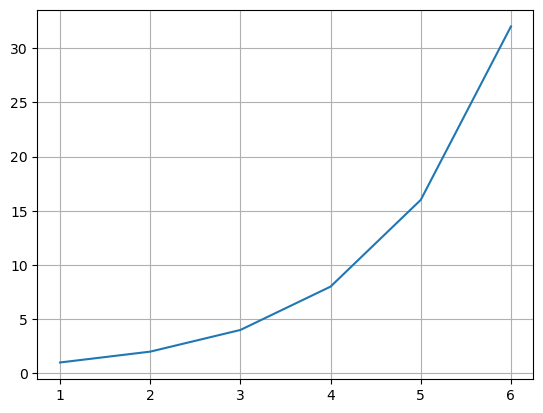

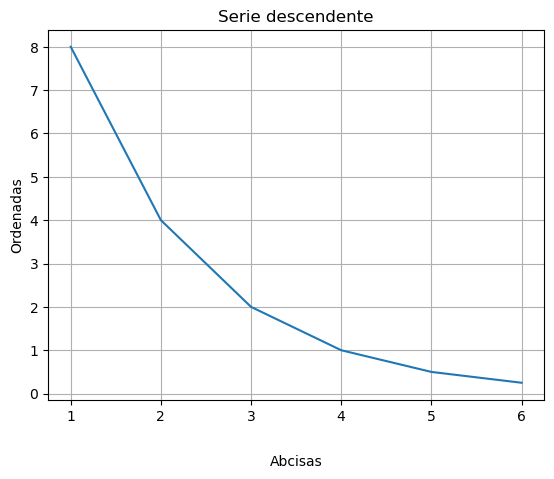

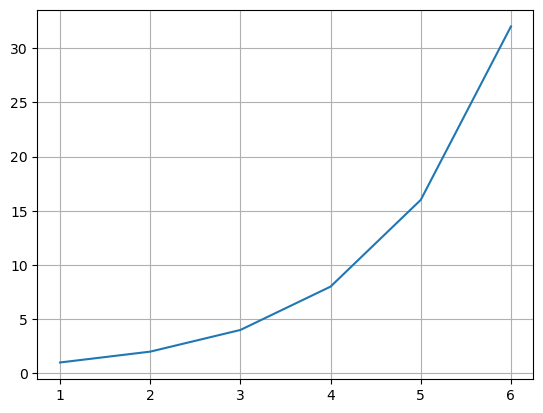

In [28]:
# Pruebas de funcionamiento:

representar_xxx_yyy([(1, 8), (2, 4), (3, 2), (4, 1), (5, 0.5), (6, 0.25)], ["Serie descendente", "Ordenadas", "Abcisas"])

representar_xxx_yyy([(1, 1), (2, 2), (3, 4), (4, 8), (5, 16), (6, 32)])

Lógicamente, hemos diseñado nuestro modelo para aplicarlo posteriormente a los datos que ya tenemos.
Concretamente, podemos aplicarlo también a la representación de los sueldos medios registrados en cada año.

[(2020, 179333.33), (2021, 147750.0), (2022, 175099.11)]


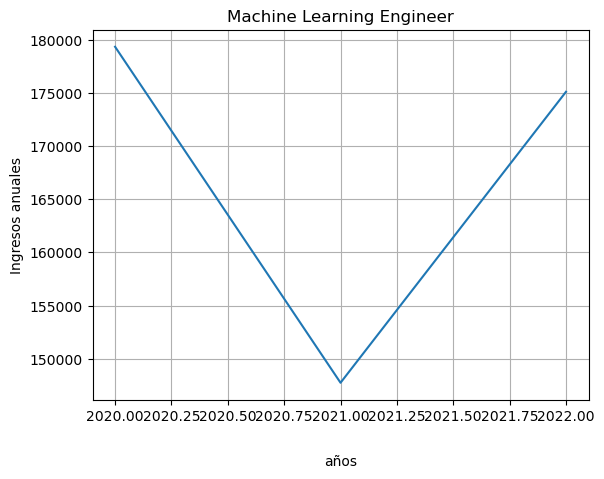

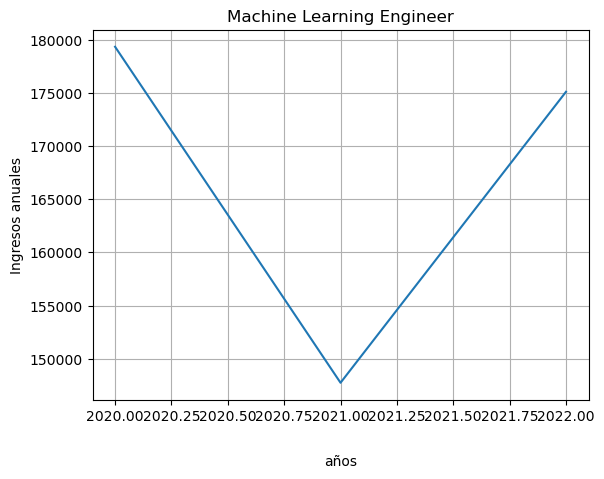

In [29]:
# Pruebas de funcionamiento:

annos = range(2020, 2023)
annos_sueldos = [(anno, average_salary_with_dict(Salarios, "Machine Learning Engineer", anno, "US")) for anno in list(annos)]

print(annos_sueldos)

representar_xxx_yyy(annos_sueldos, ["Machine Learning Engineer", "Ingresos anuales", "años"])

[(2020, 179333.33), (2021, 147750.0), (2022, 175099.11)]


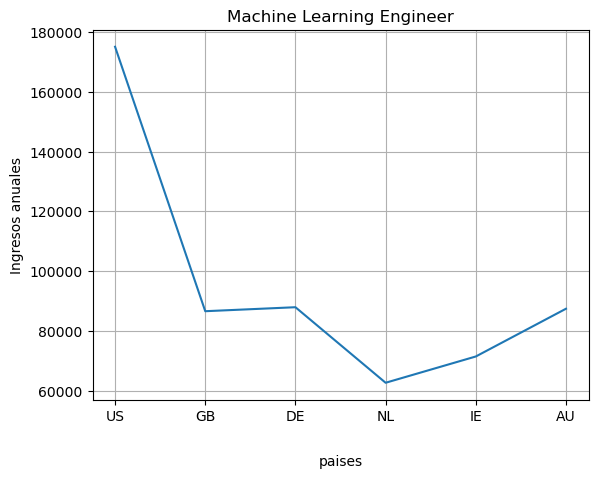

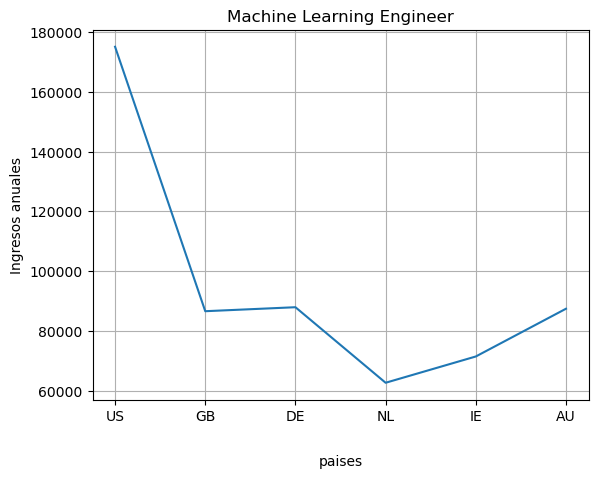

In [30]:
# Pruebas de funcionamiento:

paises = ["US", "GB", "DE", "NL", "IE", "AU"]
          
paises_sueldos = [(pais, average_salary_with_dict(Salarios, "Machine Learning Engineer", 2022, pais)) for pais in paises]

print(annos_sueldos)

representar_xxx_yyy(paises_sueldos, ["Machine Learning Engineer", "Ingresos anuales", "paises"])

## d.2) Histograma

Un gráfico más adecuado para este cometido es el histograma.

Las pruebas de funcionamiento te darán más información que las explicaciones que pueda yo dar aquí.  

**Nota.** Vemos que la curva se comporta de un modo extraño, pues sufre una caída en 2001: esto es lo que indican efectivamente los datos.

# e) Operaciones con dataframes [2 puntos]

En este apartado, vamos a trabajar con tablas de la librería `pandas`, llamadas `dataframes`.

## e.1) Carga del dataframe

La primera operación que necesitamos es cargar el archivo de datos en una tabla, como se ve en el siguiente ejemplo.

In [31]:
df = pd.read_csv('ds_salaries.csv')

def load_dataframe(datos):
    """
    Carga los datos desde un archivo CSV en un DataFrame de pandas.

    Args:
        datos (str): El nombre del archivo CSV que contiene los datos.

    Returns:
        pd.DataFrame: Un DataFrame de pandas que contiene los datos del archivo CSV.

    Ejemplo:
        datos_csv = 'ds_salaries.csv'
        tabla_completa = load_dataframe(datos_csv)
        print(tabla_completa.head())  # Muestra las primeras filas del DataFrame.

    Nota:
        Esta función carga los datos desde un archivo CSV en un DataFrame de pandas para su posterior análisis.
    """
    df = pd.read_csv('ds_salaries.csv')
    return df

In [32]:
# Comprobación

tabla_completa = load_dataframe(DatosPunComas)
tabla_completa

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


## e.2) Ajustes en nuestro archivo de datos

Deseamos ahora prescidir de la primera columna, pues únicamente da un número de orden de las filas, así como de las columnas relativas a la moneda local (`salary` y `salary currency`).

In [33]:
def tabla_abreviada(df):
    """
    Crea una versión abreviada de un DataFrame eliminando la primera columna y las columnas de salario y moneda.

    Args:
        df (pd.DataFrame): El DataFrame de pandas que se desea abreviar.

    Returns:
        df: Un nuevo DataFrame que es una versión abreviada del DataFrame original.

    Ejemplo:
        datos_csv = 'ds_salaries.csv'
        tabla_completa = load_dataframe(datos_csv)
        tabla_abreviada = tabla_abreviada(tabla_completa)
        print(tabla_abreviada.head())  # Muestra las primeras filas del DataFrame abreviado.

    Nota:
        Esta función toma un DataFrame de pandas y crea una versión abreviada eliminando la primera columna y las columnas de salario y moneda local.
    """
    df.drop(['Unnamed: 0','salary','salary_currency'],axis=1,inplace=True)
    return df

tabla_abreviada = tabla_abreviada(df)

In [34]:
# Comprobación

tabla_abreviada

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,US,100,US,M


Comprobamos también los tipos de datos de las columnas, para asegurarnos de que los datos numéricos se han cargado como tales; de lo contrario, deberíamos cambiar su tipo. 

In [35]:
# Comprobación
tabla_abreviada.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

Aunque sólo sea a efectos didácticos, la columna de los porcentajes debería ser un real... Cambia esto, sólo para practicar.

In [36]:
"""
Esta operación convierte el tipo de dato de la columna "remote_ratio" a float64. Luego, se crea un nuevo DataFrame
llamado tabla_abreviada, que es una copia del DataFrame original con la conversión aplicada.

Args:
    df (pd.DataFrame): El DataFrame de pandas original.

Note:
    Esta operación es útil cuando se necesita cambiar el tipo de dato de una columna en un DataFrame de pandas.
"""
df["remote_ratio"] = df["remote_ratio"].astype("float64")
tabla_abreviada = df.copy()

In [37]:
# Comprobación

tabla_abreviada.dtypes

work_year               int64
experience_level       object
employment_type        object
job_title              object
salary_in_usd           int64
employee_residence     object
remote_ratio          float64
company_location       object
company_size           object
dtype: object

In [38]:
# Comprobación

tabla_abreviada

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0.0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0.0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50.0,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0.0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50.0,US,L
...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,US,100.0,US,M
603,2022,SE,FT,Data Engineer,126000,US,100.0,US,M
604,2022,SE,FT,Data Analyst,129000,US,0.0,US,M
605,2022,SE,FT,Data Analyst,150000,US,100.0,US,M


También, la columna de la experiencia será más manejable si convertimos los código en números (así: "EN" -> 0, "MI" -> 1, "EX" -> 2, "SE" -> 3) y algo parecido haremos con el tamaño de las compañías ("S" -> 1, "EX: 0, "M" -> 2, "L" -> 2).

In [39]:
# Convertir los códigos de experiencia en números.
"""
Este conjunto de instrucciones convierten los valores de las columnas "experience_level" y "company_size" 
en el DataFrame original (df) según los códigos de conversión definidos (experiencia y tam) para mejor 
manejo de los datos.

Args:
    df (pd.DataFrame): El DataFrame de pandas original.

Returns:
    pd.DataFrame: Un nuevo DataFrame que es una copia del DataFrame original con las conversiones aplicadas.

Ejemplo:
    datos_csv = 'ds_salaries.csv'
    tabla_completa = load_dataframe(datos_csv)
    tabla_abreviada = tabla_abreviada(tabla_completa)
    print(tabla_abreviada.head())  # Muestra las primeras filas del DataFrame abreviado con las conversiones aplicadas.

Nota:
    Estas operaciones son útiles cuando se necesita mapear valores categóricos en columnas a valores
    numéricos para su análisis.
"""
experiencia = {"EN": 0, "MI": 1, "EX": 2, "SE": 3}
tam = {"S": 1, "M": 2, "L": 3}
df["experience_level"] = df["experience_level"].replace(experiencia)
df["company_size"] = df["company_size"].replace(tam)
tabla_abreviada = df

In [40]:
# Comprobación

tabla_abreviada

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,1,FT,Data Scientist,79833,DE,0.0,DE,3
1,2020,3,FT,Machine Learning Scientist,260000,JP,0.0,JP,1
2,2020,3,FT,Big Data Engineer,109024,GB,50.0,GB,2
3,2020,1,FT,Product Data Analyst,20000,HN,0.0,HN,1
4,2020,3,FT,Machine Learning Engineer,150000,US,50.0,US,3
...,...,...,...,...,...,...,...,...,...
602,2022,3,FT,Data Engineer,154000,US,100.0,US,2
603,2022,3,FT,Data Engineer,126000,US,100.0,US,2
604,2022,3,FT,Data Analyst,129000,US,0.0,US,2
605,2022,3,FT,Data Analyst,150000,US,100.0,US,2


In [41]:
def average_salary_with_dataframe(df, puesto, año, pais):
    """
    Calcula el salario medio para un puesto de trabajo en un año y país dados a partir de un DataFrame.

    Args:
        df (pd.DataFrame): El DataFrame de pandas que contiene los datos de salarios.
        puesto (str): El título del puesto de trabajo que se desea analizar.
        año (int): El año para el que se desea calcular el salario medio.
        pais (str): El país para el que se desea calcular el salario medio.

    Returns:
        float: El salario medio calculado como un valor decimal.

    Ejemplo:
        datos_csv = 'ds_salaries.csv'
        tabla_completa = load_dataframe(datos_csv)
        salario_medio = average_salary_with_dataframe(tabla_completa, "Data Scientist", 2022, "US")
        print(salario_medio)  # Muestra el salario medio para el puesto "Data Scientist" en 2022 en EE. UU.

    Nota:
        Esta función permite calcular el salario medio para un puesto de trabajo específico en un año y país determinados
        a partir de un DataFrame que contiene los datos de salarios. Filtra los resultados en el DataFrame según los
        criterios especificados y calcula el promedio de los salarios correspondientes.
    """
    df_filtrado = df.loc[(df["job_title"] == puesto) & (df["work_year"] == año) & (df["company_location"] == pais)]
    salario_medio = df_filtrado["salary_in_usd"].mean()
    return salario_medio

In [42]:
print(average_salary_with_dataframe(tabla_abreviada, "Data Scientist", 2020, "US"))

139067.25


Comprobamos que el resultado es el mismo que el que definimos usando el diccionario:

In [43]:
print(average_salary_with_dict(Salarios, "Data Scientist", 2020, "US"))

139067.25


## f) Un cálculo masivo con map-reduce [Resuelto]

En este apartado se ha de realizar un programa aparte que calcule, para cada país, el número de cada puesto de trabajo que tiene contratado, junto con el máximo sueldo de cada categoría pra dicho país con independencia de laño.

    C:\...> python puestos_trabajo.py -q ds_salaries.norm.csv

El programa funcionará necesariamente con la técnica map-reduce, que podemos poner en juego con la librería `mrjob`.

El funcionamiento del mismo se puede activar también desde aquí:

In [44]:
# Hagamos una llamada al programa de consola desde aquí:

#! python puestos_trabajo.py -q ds_salaries.norm.csv

In [45]:
# Para que el resultado se almacene en un archivo:

#! python puestos_trabajo.py -q ds_salaries.norm.csv  > sueldos_maximos.txt

Para que pueda yo ver tu programa cómodamente desde aquí, también se puede mostrar con un comando de la consola, anteponiendo el símbolo `!`. Observaciones:

- La instrucción siguiente está comentada para ocultar una solución mía.
  Tú debes suprimir el símbolo `#` del comentario
  para mostrar tu solución aquí.
- Desde mac o linux, se ha de usar el comando `cat`, en vez de `type`.

In [46]:
# ! type puestos_trabajo.py

## f_bis) Un cálculo masivo con map-reduce [0.5 puntos]

<br>

<font color="darkblue">
Como la solución del apartado anterior se entregó por error mío, puedes, si lo deseas, inventar tú mismo un nuevo enunciado para ser resuelto con la técnica de *map-reduce*, y proponer luego una solución para el mismo.
</font>

## g) Un apartado libre [0.5 puntos]

<br>

<font color="green">
Dejo este apartado a tu voluntad. Inventa tú mismo el enunciado y resuélvelo, mostrando algún aspecto de programación en Python no contemplado o alguna técnica o librería que no has puesto en juego en los apartados anteriores, relacionado con el análisis de datos y con este proyecto. He aquí dos o tres ejemplos posibles:

- Me he quedado un poco insatisfecho con el uso de pandas, que encuentro un poco escaso:
  este apartado puede poner en juego algunas algunas operaciones que no hemos visto
  en esta librería.
  
- El acabado de las figuras es algo rudimentario.
  en cambio, la librería Plotly me permite permitirte trazar figuras más
  profesionales, y una posibilidad sencilla es quizá
  importar los datos del archivo creado por el programa de map-reduce
  y representarlos gráficamente.
  
- La disponibilidad de datos de geolocalización puede permitirte alguna representación
  de la ubicación de los vehísulos registrados en su posición geográfica.
  
Estos ejemplos pueden servirte como pista, pero que no te limiten. Hay muchas otras posibilidades: geopandas, web scraping, etc.

En la evaluación, si este apartado está bien o muy bien, anota un 0,3 o 0,4. El 0,5 lo reservaremos para las situaciones en que se presente algo brillante, con alguna idea original o alguna técnica novedosa o complejidad especial o algún gráfico vistoso. Especialmente quien opta a un 9,5 o más, debe esmerarse en plantear este apartado a la altura de esa calificación.
</font>

<br>

### g.1) Enunciado

<br>

<font color="darkblue">
Completa tú este enunciado, y pon el color de la fuente en azul oscuro.
</font>

In [47]:
# Pruebas de funcionamiento, también tarea del estudiante:


### Datos personales

<br>

<font color="darkblue">

-   **Apellidos:** del Pozo Iglesias
-   **Nombre:** Claudia
-   **Email:** claudia.delpozo.iglesias@gmail.com
-   **Email: (UCM)** cdelpo03@ucm.es
-   **Fecha:** 16/11/2023

<br>

<font color="black">
    
### Ficha de autoevaluación

<br>

<font color="darkblue">
Me han costado bastante los ejercicios de diccionarios y tablas, principalmente por la forma en la que se acceden a estos y por dificultades personales a la hora de relacionar conceptos. También me han costado los ejemplos de la documentación.
</font>

<br>

<font color="darkblue">
    
|Apartado|Calificación|Comentario|
|-|-|-|
|a)  |2.0  / 2.0  |Completamente resuelto |
|b)  |2.0  / 2.0  |Completamente resuelto |
|c)  |2.0  / 2.0  |Completamente resuelto |
|d)  |0.5 / 1.5   |Los outputs no son los que se esperaban |
|e)  |1.5  / 1.5  |Completamente resuelto |
|f)  |0.5  / 0.5  |Resuelto|
|g)  |0.0  / 0.5  |No he tenido tiempo de poder hacer algo que fuera suficiente |
|**Total** |**8.5** / 10.0|**Aprobado**|
</font>

<br>

<font color="black">
   
### Ayuda recibida y fuentes utilizadas
    
</font>
<br>

<font color="darkblue">
   
He usado los apuntes de la carrera de python así como ejemplos de ejercicios que tenía por el ordenador guardados.
Además he visitado StackOverflow para resolver errores que no sabía a qué se debían y algún vídeo de Youtube para entender mejor los accesos a los diccionarios.
    
</font>
<br>

<font color="black">
    
### Comentario adicional

</font>

<br>
<font color="darkblue">
    
Me hubiera gustado hacer más uso de Pandas y MatPlotlib por la gran amplitud que tienen.

</font>

In [48]:
# Esta celda se ha de respetar: está aquí para comprobar el funcionamiento de algunas funciones por parte de tu profesor
